In [214]:
#Import all the modules 

import requests
import json
import csv
import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt
from time import *
import plotly
pd.options.plotting.backend = "plotly"
import plotly.express as px
import plotly.graph_objects as go
import random
from tabulate import tabulate

In [2]:
kraken_validator_list = []
binance_validator_list = []
lido_validator_list = []

In [4]:
# with open('api_key.txt', 'r') as api_file:
#     api_key = api_file.read()
    
# addresses = ['0xa40dfee99e1c85dc97fdc594b16a460717838703','0x32c96d17d81615789357160b41da2ef8b712eba8','0xfe56a0dbdad44dd14e4d560632cc842c8a13642b']
  

# x = requests.get('https://beaconcha.in/api/v1/validator/eth1/{}?api_key={}'.format(addresses[0], api_key))
# data = x.json()['data']
# for i in data:
#     kraken_validator_list.append(i['validatorindex'])
    
# x = requests.get('https://beaconcha.in/api/v1/validator/eth1/{}?api_key={}'.format(addresses[1], api_key))
# data = x.json()['data']
# for i in data:
#     binance_validator_list.append(i['validatorindex'])

# x = requests.get('https://beaconcha.in/api/v1/validator/eth1/{}?api_key={}'.format(addresses[2], api_key))
# data = x.json()['data']
# for i in data:
#     lido_validator_list.append(i['validatorindex'])

In [11]:
# kraken_validator_list = random.sample(kraken_validator_list,1000)
# lido_validator_list = random.sample(lido_validator_list,1000)

In [16]:
with open("kraken_validator.txt", "w") as output:
    for listitem in kraken_validator_list:
        output.write('%s\n' % listitem)

    
with open("binance_validator.txt", "w") as output:
    for listitem in binance_validator_list:
        output.write('%s\n' % listitem)
    
with open("lido_validator.txt", "w") as output:
    for listitem in lido_validator_list:
        output.write('%s\n' % listitem)

## Attestation effectiveness

In [17]:
# kraken_dict = {}
# binance_dict = {}
# lido_dict = {}

In [40]:
for i in range(100,1000,100):
    
    str1 = ''
    #str2 = ''

    for j in range(99):
        if kraken_validator_list[i+j] != None:
            str1 = str1 + str(kraken_validator_list[i+j]) + ','
        #str2 = str2 + str(i+j) + ','
    
    str1 = str1 + str(kraken_validator_list[i+99])
    x = requests.get('https://beaconcha.in/api/v1/validator/{}/attestationeffectiveness?api_key={}'.format(str1, api_key))
    sleep(6)
    data = x.json()['data']
    
    for i in data:
        kraken_dict[i['validatorindex']] = i['attestation_effectiveness']       

In [86]:
for i in range(0,999,100):
    
    str1 = ''
    #str2 = ''

    for j in range(99):
        if binance_validator_list[i+j] != None:
            str1 = str1 + str(binance_validator_list[i+j]) + ','
        #str2 = str2 + str(i+j) + ','
    
    str1 = str1 + str(binance_validator_list[i+99])
    x = requests.get('https://beaconcha.in/api/v1/validator/{}/attestationeffectiveness?api_key={}'.format(str1, api_key))
    sleep(6)
    data = x.json()['data']
    
    for i in data:
        binance_dict[i['validatorindex']] = i['attestation_effectiveness'] 

In [89]:
for i in range(0,999,100):
    
    str1 = ''
    #str2 = ''

    for j in range(99):
        if lido_validator_list[i+j] != None:
            str1 = str1 + str(lido_validator_list[i+j]) + ','
        #str2 = str2 + str(i+j) + ','
    
    str1 = str1 + str(lido_validator_list[i+99])
    x = requests.get('https://beaconcha.in/api/v1/validator/{}/attestationeffectiveness?api_key={}'.format(str1, api_key))
    sleep(6)
    data = x.json()['data']
    
    for i in data:
        lido_dict[i['validatorindex']] = i['attestation_effectiveness'] 

In [128]:
a_file = open("kraken_effectiveness.csv", "w")
writer = csv.writer(a_file)

for key, value in kraken_dict.items():
    writer.writerow([key, value])
    
a_file = open("binance_effectiveness.csv", "w")
writer = csv.writer(a_file)

for key, value in binance_dict.items():
    writer.writerow([key, value])
    
a_file = open("lido_effectiveness.csv", "w")
writer = csv.writer(a_file)

for key, value in lido_dict.items():
    writer.writerow([key, value])

#### Kraken

In [91]:
kraken_effectiveness_list = pd.Series(kraken_dict.values())
kraken_effectiveness_list.describe()

count    999.000000
mean       0.993977
std        0.015514
min        0.847458
25%        0.990099
50%        1.000000
75%        1.000000
max        1.000000
dtype: float64

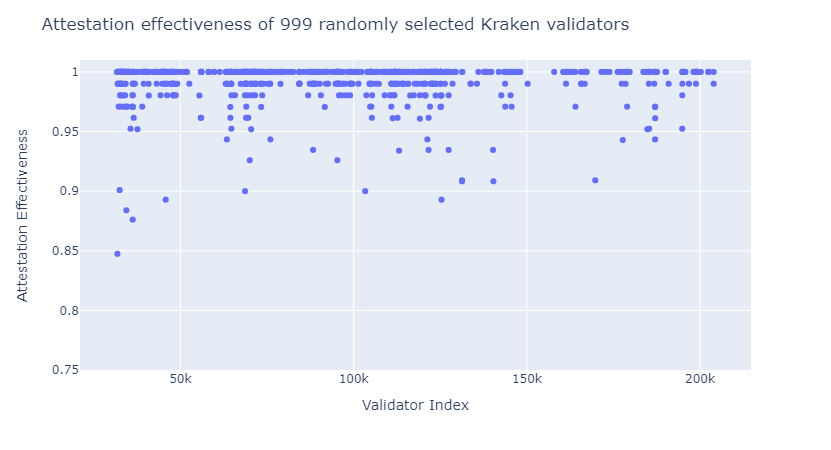

In [125]:
import plotly.express as px
fig = px.scatter(x= kraken_dict.keys(), y=kraken_dict.values(), labels = {"x": "Validator Index", "y": "Attestation Effectiveness"})
fig.update_layout(title = "Attestation effectiveness of 999 randomly selected Kraken validators")
fig.update_yaxes(range=[0.75, 1.01])
fig.show()

#### Binance

In [95]:
binance_effectiveness_list = pd.Series(binance_dict.values())
binance_effectiveness_list.describe()

count    999.000000
mean       0.991999
std        0.022949
min        0.755725
25%        0.990099
50%        1.000000
75%        1.000000
max        1.000000
dtype: float64

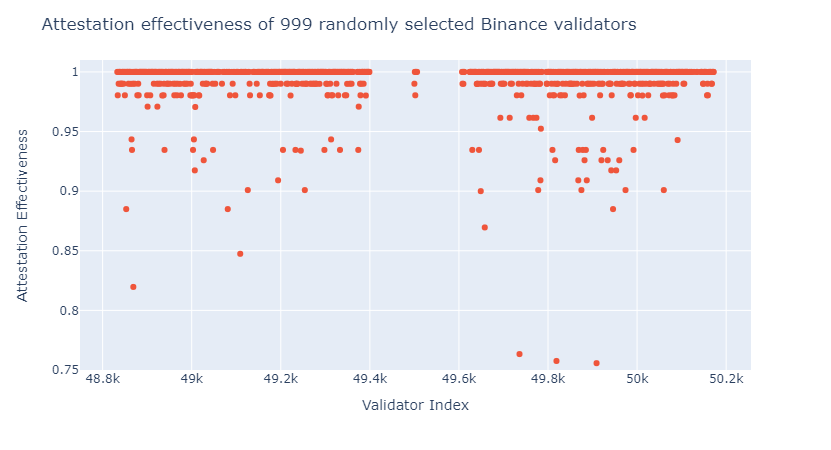

In [126]:
import plotly.express as px

lst = []
for i in range(999):
    lst.append("#EF553B")

fig = px.scatter(x= binance_dict.keys(), y=binance_dict.values(), labels = {"x": "Validator Index", "y": "Attestation Effectiveness"}, color = lst, color_discrete_map = "identity")
fig.update_yaxes(range=[0.75, 1.01])
fig.update_layout(title = "Attestation effectiveness of 999 randomly selected Binance validators")
fig.show()

#### Lido

In [96]:
lido_effectiveness_list = pd.Series(lido_dict.values())
lido_effectiveness_list.describe()

count    999.000000
mean       0.994068
std        0.012583
min        0.916667
25%        0.990099
50%        1.000000
75%        1.000000
max        1.000000
dtype: float64

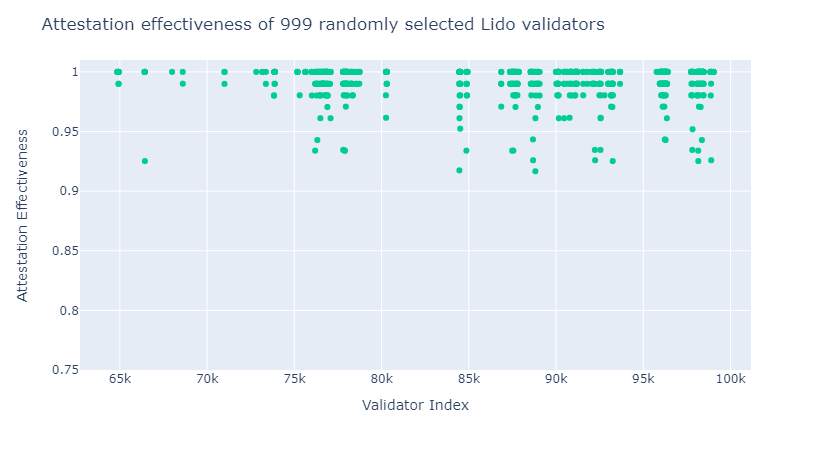

In [127]:
import plotly.express as px

lst = []
for i in range(999):
    lst.append("#00CC96")

fig = px.scatter(x= lido_dict.keys(), y=lido_dict.values(), labels = {"x": "Validator Index", "y": "Attestation Effectiveness"}, color = lst, color_discrete_map = "identity")
fig.update_yaxes(range=[0.75, 1.01])
fig.update_layout(title = "Attestation effectiveness of 999 randomly selected Lido validators")
fig.show()

In [182]:
kraken_display = []
binance_display = []
lido_display = []

for i in kraken_effectiveness_list:
    kraken_display.append(str(i))
    
for i in binance_effectiveness_list:
    binance_display.append(str(i))
    
for i in lido_effectiveness_list:
    lido_display.append(str(i))

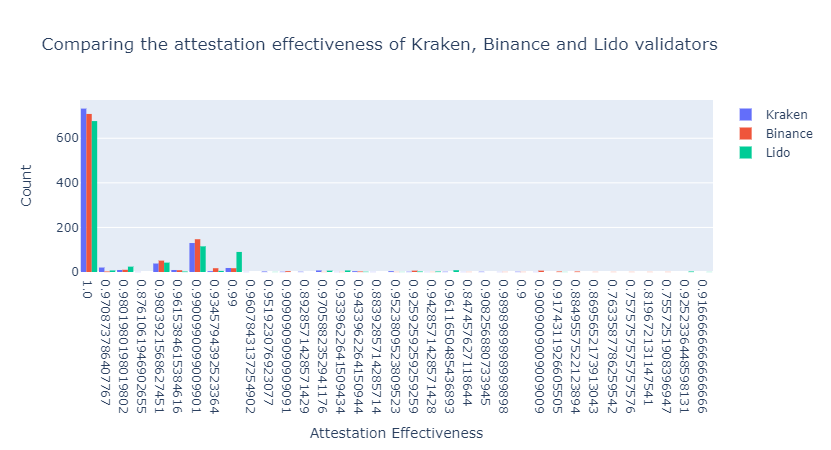

In [184]:
fig = go.Figure()

fig.add_trace(go.Histogram(
    x=kraken_display,
    bingroup=1, name = "Kraken"))

fig.add_trace(go.Histogram(
    x=binance_display,
    bingroup=1, name = "Binance"))

fig.add_trace(go.Histogram(
    x=lido_display,
    bingroup=1, name = "Lido"))

fig.update_layout(
    bargap=0.1,
    title = "Comparing the attestation effectiveness of Kraken, Binance and Lido validators")

fig.update_xaxes(title="Attestation Effectiveness")
fig.update_yaxes(title="Count")

fig.show()

## Earnings

In [132]:
kraken_earnings_7d = {}
kraken_earnings_31d = {}
kraken_earnings_365d = {}

binance_earnings_7d = {}
binance_earnings_31d = {}
binance_earnings_365d = {}

lido_earnings_7d = {}
lido_earnings_31d = {}
lido_earnings_365d = {}

In [133]:
for i in range(0,1000,100):
    
    str1 = ''
    #str2 = ''

    for j in range(99):
        if kraken_validator_list[i+j] != None:
            str1 = str1 + str(kraken_validator_list[i+j]) + ','
        #str2 = str2 + str(i+j) + ','
    
    str1 = str1 + str(kraken_validator_list[i+99])
    x = requests.get('https://beaconcha.in/api/v1/validator/{}/performance?api_key={}'.format(str1, api_key))
    sleep(6)
    data = x.json()['data']
    
    for i in data:
        kraken_earnings_7d[i['validatorindex']] = i['performance7d']  
        kraken_earnings_31d[i['validatorindex']] = i['performance31d']  
        kraken_earnings_365d[i['validatorindex']] = i['performance365d']  

In [137]:
for i in range(0,1000,100):
    
    str1 = ''
    #str2 = ''

    for j in range(99):
        if binance_validator_list[i+j] != None:
            str1 = str1 + str(binance_validator_list[i+j]) + ','
        #str2 = str2 + str(i+j) + ','
    
    str1 = str1 + str(binance_validator_list[i+99])
    x = requests.get('https://beaconcha.in/api/v1/validator/{}/performance?api_key={}'.format(str1, api_key))
    sleep(6)
    data = x.json()['data']
    
    for i in data:
        binance_earnings_7d[i['validatorindex']] = i['performance7d']  
        binance_earnings_31d[i['validatorindex']] = i['performance31d']  
        binance_earnings_365d[i['validatorindex']] = i['performance365d']  

In [138]:
for i in range(0,1000,100):
    
    str1 = ''
    #str2 = ''

    for j in range(99):
        if lido_validator_list[i+j] != None:
            str1 = str1 + str(lido_validator_list[i+j]) + ','
        #str2 = str2 + str(i+j) + ','
    
    str1 = str1 + str(lido_validator_list[i+99])
    x = requests.get('https://beaconcha.in/api/v1/validator/{}/performance?api_key={}'.format(str1, api_key))
    sleep(6)
    data = x.json()['data']
    
    for i in data:
        lido_earnings_7d[i['validatorindex']] = i['performance7d']  
        lido_earnings_31d[i['validatorindex']] = i['performance31d']  
        lido_earnings_365d[i['validatorindex']] = i['performance365d']  

In [155]:
lst = []
for i in range(1000):
    lst.append(i)

#### Kraken

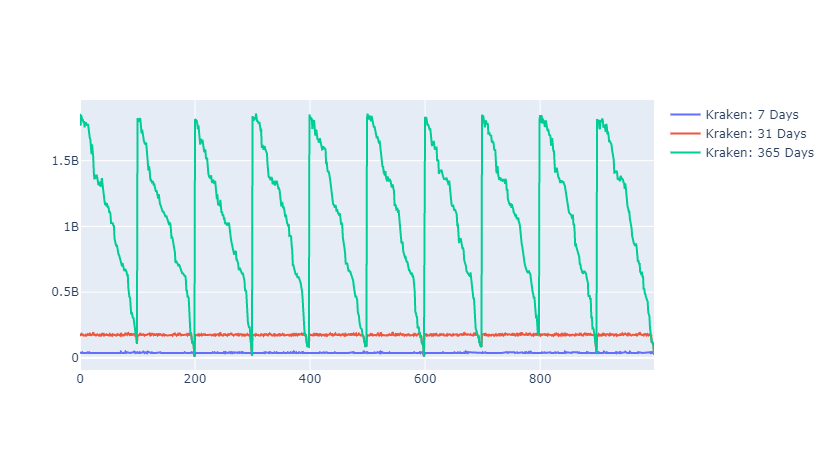

In [176]:
import plotly.graph_objects as go

fig = go.Figure(data=[
    go.Scatter(name='Kraken: 7 Days', x=lst, y = list(kraken_earnings_7d.values())),
    go.Scatter(name='Kraken: 31 Days', x=lst, y=list(kraken_earnings_31d.values())),
    go.Scatter(name='Kraken: 365 Days', x=lst, y=list(kraken_earnings_365d.values()))
])

fig.show()

In [169]:
kraken_7d_list = pd.Series(kraken_earnings_7d.values())
kraken_7d_list.describe()

count    9.990000e+02
mean     3.875855e+07
std      2.856184e+06
min      1.046607e+07
25%      3.735281e+07
50%      3.761894e+07
75%      4.182542e+07
max      4.789768e+07
dtype: float64

#### Binance

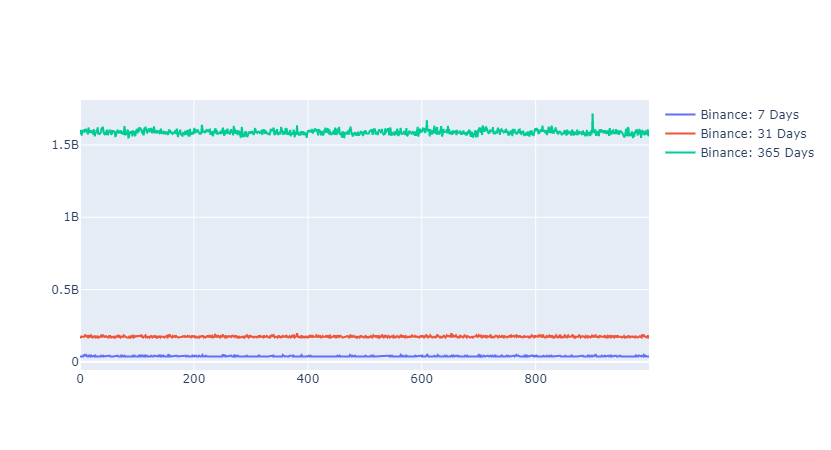

In [178]:
import plotly.graph_objects as go

fig = go.Figure(data=[
    go.Scatter(name='Binance: 7 Days', x=lst, y = list(binance_earnings_7d.values())),
    go.Scatter(name='Binance: 31 Days', x=lst, y=list(binance_earnings_31d.values())),
    go.Scatter(name='Binance: 365 Days', x=lst, y=list(binance_earnings_365d.values()))
])

fig.show()

In [179]:
binance_7d_list = pd.Series(binance_earnings_7d.values())
binance_7d_list.describe()

count    1.000000e+03
mean     3.867445e+07
std      2.559157e+06
min      3.687576e+07
25%      3.740303e+07
50%      3.750810e+07
75%      3.766571e+07
max      5.298406e+07
dtype: float64

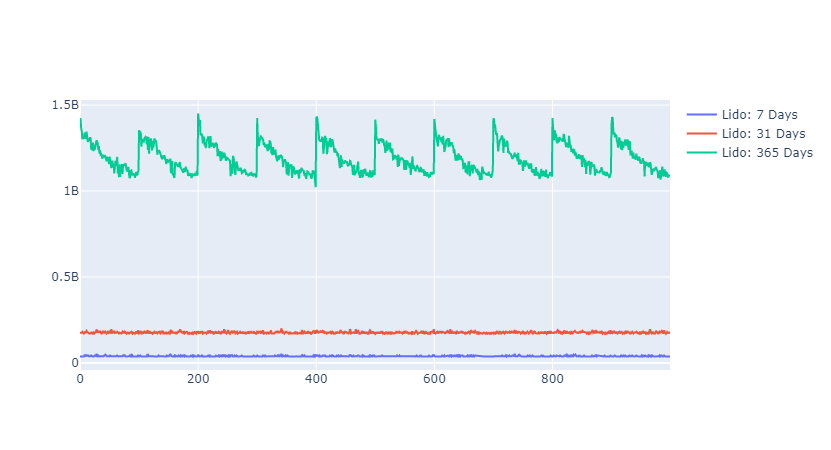

In [180]:
import plotly.graph_objects as go

fig = go.Figure(data=[
    go.Scatter(name='Lido: 7 Days', x=lst, y = list(lido_earnings_7d.values())),
    go.Scatter(name='Lido: 31 Days', x=lst, y=list(lido_earnings_31d.values())),
    go.Scatter(name='Lido: 365 Days', x=lst, y=list(lido_earnings_365d.values()))
])

fig.show()

In [181]:
lido_7d_list = pd.Series(lido_earnings_7d.values())
lido_7d_list.describe()

count    1.000000e+03
mean     3.914582e+07
std      2.638327e+06
min      3.731194e+07
25%      3.783102e+07
50%      3.803965e+07
75%      3.814433e+07
max      5.327081e+07
dtype: float64

## Leaderboard (Top 10)

In [187]:
x = requests.get('https://beaconcha.in/api/v1/validator/leaderboard?api_key={}'.format(api_key))

data = x.json()['data']
ranking_dict = {}
for i in data:
    ranking_dict[i['rank7d']] = i['validatorindex']

In [198]:
df = pd.DataFrame(list(ranking_dict.items()), columns = ['Rank', 'Validator index'])
df = df[:10]
df

,Rank,Validator index
0,1,49065
1,2,137635
2,3,35996
3,4,21290
4,5,103300
5,6,14113
6,7,85177
7,8,168700
8,9,48747
9,10,85973


In [196]:
entity_list = ['Piedao', 'Lido', 'Unknown', 'Stakefish', 'Unknown', 'Whale', 'Whale', 'Stakefish', 'Stakefish', 'Binance']
df['Entities'] = entity_list
df

,Rank,Validator index,Entities
0,1,49065,Piedao
1,2,137635,Lido
2,3,35996,Unknown
3,4,21290,Stakefish
4,5,103300,Unknown
5,6,14113,Whale
6,7,85177,Whale
7,8,168700,Stakefish
8,9,48747,Stakefish
9,10,85973,Binance


## Validator balance

In [200]:
kraken = []
binance = []
lido = []

In [201]:
for i in range(0,1000,100):
    
    str1 = ''
    #str2 = ''

    for j in range(99):
        if kraken_validator_list[i+j] != None:
            str1 = str1 + str(kraken_validator_list[i+j]) + ','
        #str2 = str2 + str(i+j) + ','
    
    str1 = str1 + str(kraken_validator_list[i+99])
    x = requests.get('https://beaconcha.in/api/v1/validator/{}/balancehistory?api_key={}'.format(str1, api_key))
    sleep(6)
    data = x.json()['data']
    
    for i in data:
        kraken.append(i['balance'])

In [202]:
for i in range(0,1000,100):
    
    str1 = ''
    #str2 = ''

    for j in range(99):
        if binance_validator_list[i+j] != None:
            str1 = str1 + str(binance_validator_list[i+j]) + ','
        #str2 = str2 + str(i+j) + ','
    
    str1 = str1 + str(binance_validator_list[i+99])
    x = requests.get('https://beaconcha.in/api/v1/validator/{}/balancehistory?api_key={}'.format(str1, api_key))
    sleep(6)
    data = x.json()['data']
    
    for i in data:
        binance.append(i['balance'])

In [203]:
for i in range(0,1000,100):
    
    str1 = ''
    #str2 = ''

    for j in range(99):
        if lido_validator_list[i+j] != None:
            str1 = str1 + str(lido_validator_list[i+j]) + ','
        #str2 = str2 + str(i+j) + ','
    
    str1 = str1 + str(lido_validator_list[i+99])
    x = requests.get('https://beaconcha.in/api/v1/validator/{}/balancehistory?api_key={}'.format(str1, api_key))
    sleep(6)
    data = x.json()['data']
    
    for i in data:
        lido.append(i['balance'])

In [207]:
lst = []
for i in range(100*100):
    lst.append(i)

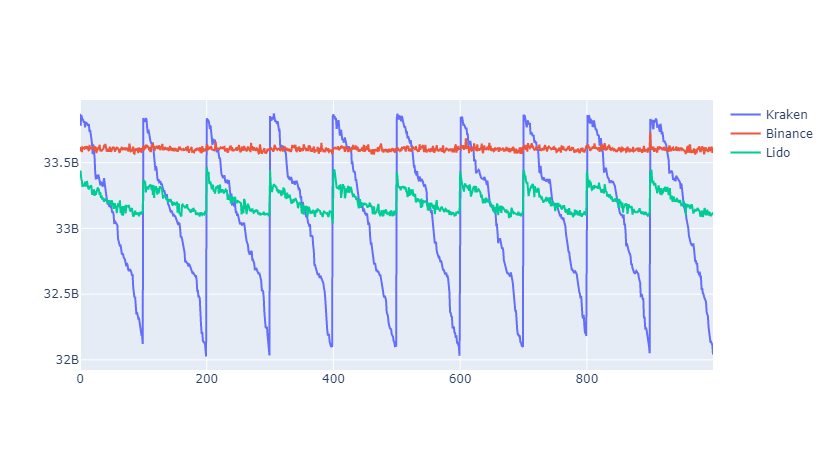

In [208]:
import plotly.graph_objects as go

fig = go.Figure(data=[
    go.Scatter(name='Kraken', x=lst, y = kraken),
    go.Scatter(name='Binance', x=lst, y = binance),
    go.Scatter(name='Lido', x=lst, y= lido)
])

fig.show()

### Max balance

In [209]:
table_max_balance = [['Kraken', max(kraken)], ['Binance', max(binance)], ['Lido', max(lido)]]

In [215]:
print(tabulate(table_max_balance, tablefmt='fancy_grid'))

╒═════════╤═════════════╕
│ Kraken  │ 33873928554 │
├─────────┼─────────────┤
│ Binance │ 33732136359 │
├─────────┼─────────────┤
│ Lido    │ 33465761808 │
╘═════════╧═════════════╛


### Min balance

In [216]:
table_min_balance = [['Kraken', min(kraken)], ['Binance', min(binance)], ['Lido', min(lido)]]

In [217]:
print(tabulate(table_min_balance, tablefmt='fancy_grid'))

╒═════════╤═════════════╕
│ Kraken  │ 32025728976 │
├─────────┼─────────────┤
│ Binance │ 33561702567 │
├─────────┼─────────────┤
│ Lido    │ 33036603265 │
╘═════════╧═════════════╛


## Validator balance and age

In [218]:
epoch = 56722

In [221]:
kraken_balance_age = []
binance_balance_age = []
lido_balance_age = []

In [222]:
for i in range(0,1000,100):
    
    str1 = ''
    #str2 = ''

    for j in range(99):
        if kraken_validator_list[i+j] != None:
            str1 = str1 + str(kraken_validator_list[i+j]) + ','
        #str2 = str2 + str(i+j) + ','
    
    str1 = str1 + str(kraken_validator_list[i+99])
    x = requests.get('https://beaconcha.in/api/v1/validator/{}?api_key={}'.format(str1, api_key))
    sleep(6)
    data = x.json()['data']
    
    for i in data:
        kraken_balance_age.append((i['balance'], epoch - i['activationepoch']))

In [223]:
for i in range(0,1000,100):
    
    str1 = ''
    #str2 = ''

    for j in range(99):
        if binance_validator_list[i+j] != None:
            str1 = str1 + str(binance_validator_list[i+j]) + ','
        #str2 = str2 + str(i+j) + ','
    
    str1 = str1 + str(binance_validator_list[i+99])
    x = requests.get('https://beaconcha.in/api/v1/validator/{}?api_key={}'.format(str1, api_key))
    sleep(6)
    data = x.json()['data']
    
    for i in data:
        binance_balance_age.append((i['balance'], epoch - i['activationepoch']))

In [224]:
for i in range(0,1000,100):
    
    str1 = ''
    #str2 = ''

    for j in range(99):
        if lido_validator_list[i+j] != None:
            str1 = str1 + str(lido_validator_list[i+j]) + ','
        #str2 = str2 + str(i+j) + ','
    
    str1 = str1 + str(lido_validator_list[i+99])
    x = requests.get('https://beaconcha.in/api/v1/validator/{}?api_key={}'.format(str1, api_key))
    sleep(6)
    data = x.json()['data']
    
    for i in data:
        lido_balance_age.append((i['balance'], epoch - i['activationepoch']))

In [229]:
kraken_balance = []
kraken_age = []

for i in kraken_balance_age:
    kraken_balance.append(i[0])
    kraken_age.append(i[1])

In [242]:
binance_balance = []
binance_age = []

for i in binance_balance_age:
    binance_balance.append(i[0])
    binance_age.append(i[1])

In [243]:
lido_balance = []
lido_age = []

for i in lido_balance_age:
    lido_balance.append(i[0])
    lido_age.append(i[1])

#### Kraken

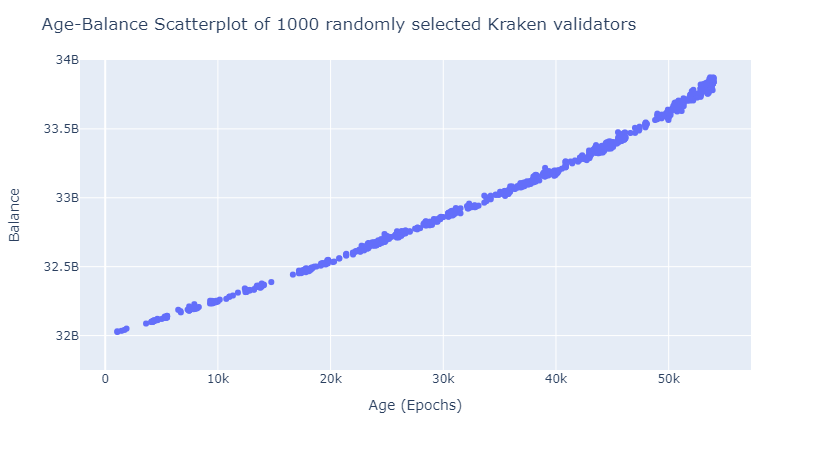

In [264]:
fig = px.scatter(x= kraken_age, y=kraken_balance, labels = {"x": "Age (Epochs)", "y": "Balance"})
fig.update_layout(title = "Age-Balance Scatterplot of 1000 randomly selected Kraken validators")
fig.update_yaxes(range=[31750000000, 34000000000])
fig.show()

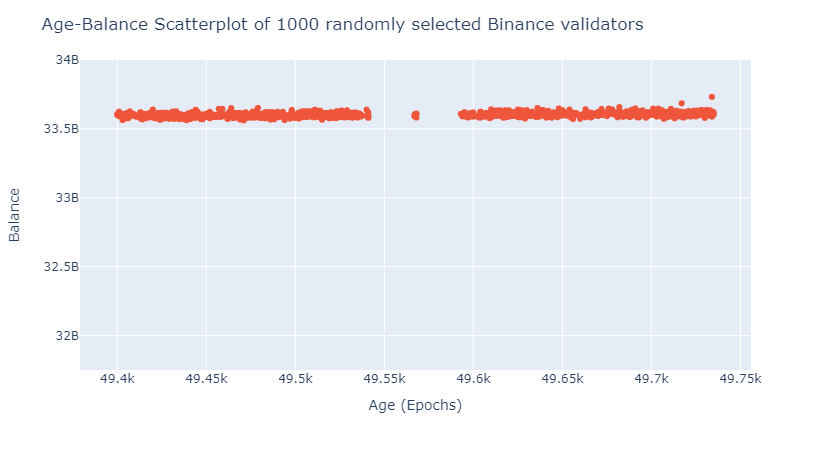

In [265]:
lst = []
for i in range(1000):
    lst.append("#EF553B")
    
fig = px.scatter(x= binance_age, y=binance_balance, labels = {"x": "Age (Epochs)", "y": "Balance"}, color = lst, color_discrete_map = "identity")
fig.update_yaxes(range=[31750000000, 34000000000])
fig.update_layout(title = "Age-Balance Scatterplot of 1000 randomly selected Binance validators")
fig.show()

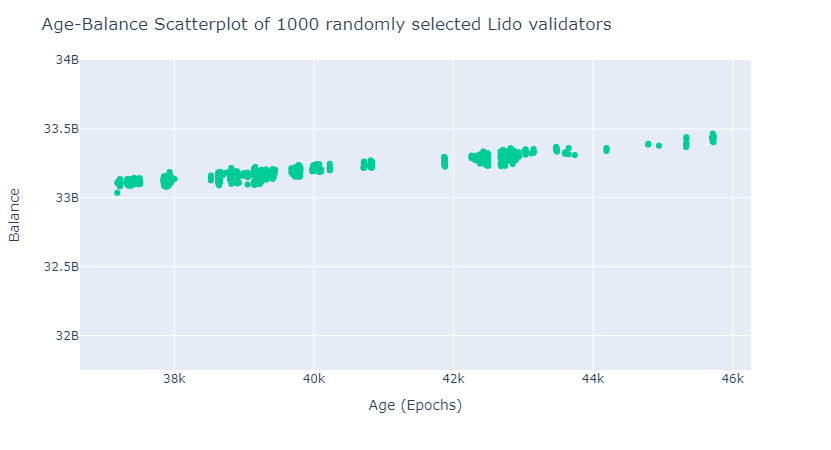

In [266]:
lst = []
for i in range(1000):
    lst.append("#00CC96")

fig = px.scatter(x= lido_age, y=lido_balance, labels = {"x": "Age (Epochs)", "y": "Balance"}, color = lst, color_discrete_map = "identity")
fig.update_yaxes(range=[31750000000, 34000000000])
fig.update_layout(title = "Age-Balance Scatterplot of 1000 randomly selected Lido validators")
fig.show()

## Missed and Orphaned attestations 

#### Kraken

In [291]:
x = requests.get('https://beaconcha.in/api/v1/validator/stats/31882?api_key={}'.format(api_key))
data = x.json()['data']

In [292]:
kraken_missed = 0

for i in data:
    if type(i['missed_attestations']) == int:
        kraken_missed += i['missed_attestations']

In [293]:
table = [['Missed attestations', kraken_missed]]
print(tabulate(table, tablefmt='fancy_grid'))

╒═════════════════════╤═════╕
│ Missed attestations │ 373 │
╘═════════════════════╧═════╛


#### Binance

In [294]:
x = requests.get('https://beaconcha.in/api/v1/validator/stats/48869?api_key={}'.format(api_key))
data = x.json()['data']

In [295]:
binance_missed = 0

for i in data:
    if type(i['missed_attestations']) == int:
        binance_missed += i['missed_attestations']

In [296]:
table = [['Missed attestations', binance_missed]]
print(tabulate(table, tablefmt='fancy_grid'))

╒═════════════════════╤═════╕
│ Missed attestations │ 310 │
╘═════════════════════╧═════╛


#### Lido

In [300]:
x = requests.get('https://beaconcha.in/api/v1/validator/stats/84461?api_key={}'.format(api_key))
data = x.json()['data']

In [305]:
lido_missed = 0

for i in data:
    if type(i['missed_attestations']) == int:
        lido_missed += i['missed_attestations']

In [306]:
table = [['Missed attestations', lido_missed]]
print(tabulate(table, tablefmt='fancy_grid'))

╒═════════════════════╤════╕
│ Missed attestations │ 54 │
╘═════════════════════╧════╛


## Missed blocks

#### Kraken

In [307]:
x = requests.get('https://beaconcha.in/api/v1/validator/stats/31882?api_key={}'.format(api_key))
data = x.json()['data']

In [308]:
kraken_missed = 0

for i in data:
    if type(i['missed_blocks']) == int:
        kraken_missed += i['missed_blocks']

In [310]:
table = [['Missed blocks', kraken_missed]]
print(tabulate(table, tablefmt='fancy_grid'))

╒═══════════════╤═══╕
│ Missed blocks │ 0 │
╘═══════════════╧═══╛


#### Binance

In [311]:
x = requests.get('https://beaconcha.in/api/v1/validator/stats/48869?api_key={}'.format(api_key))
data = x.json()['data']

In [312]:
binance_missed = 0

for i in data:
    if type(i['missed_blocks']) == int:
        binance_missed += i['missed_blocks']

In [313]:
table = [['Missed blocks', binance_missed]]
print(tabulate(table, tablefmt='fancy_grid'))

╒═══════════════╤═══╕
│ Missed blocks │ 0 │
╘═══════════════╧═══╛


#### Lido

In [314]:
x = requests.get('https://beaconcha.in/api/v1/validator/stats/84461?api_key={}'.format(api_key))
data = x.json()['data']

In [315]:
lido_missed = 0

for i in data:
    if type(i['missed_blocks']) == int:
        lido_missed += i['missed_blocks']

In [316]:
table = [['Missed blocks', lido_missed]]
print(tabulate(table, tablefmt='fancy_grid'))

╒═══════════════╤═══╕
│ Missed blocks │ 0 │
╘═══════════════╧═══╛
